In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
from sklearn.metrics import f1_score,confusion_matrix
from keras.layers import Dense
from keras.activations import swish

In [ ]:
# image size and batch size
IMAGE_SIZE = 224
BATCH_SIZE = 32

data_dir = "lung/new_input"


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    classes=['beningn', 'malignant']
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    classes=['beningn', 'malignant']
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    classes=['beningn', 'malignant']
)

# model architecture
base_model = EfficientNetB0(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(128, activation='swish')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n // BATCH_SIZE,
                    epochs=25,
                    validation_data=val_generator,
                    validation_steps=val_generator.n // BATCH_SIZE)

# Evaluate the model
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)

# Make predictions 
Y_test = test_generator.classes
Y_pred = model.predict(test_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)  # Convert probabilities to binary predictions

#  evaluation metrics
print("Test loss: {:.4f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(test_acc * 100))
print("Test precision: {:.2f}%".format(test_precision * 100))
print("Test recall: {:.2f}%".format(test_recall * 100))
print("F1 score: {:.2f}".format(f1_score(Y_test, y_pred)))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))


Found 13589 images belonging to 2 classes.
Found 3397 images belonging to 2 classes.
Found 3397 images belonging to 2 classes.
Epoch 1/25
424/424 [==============================] - 2267s 5s/step - loss: 0.0024 - accuracy: 0.9996 - precision: 0.9994 - recall: 0.9997 - val_loss: 0.9791 - val_accuracy: 0.9169 - val_precision: 1.0000 - val_recall: 0.8174
Epoch 2/25
424/424 [==============================] - 2197s 5s/step - loss: 1.6080e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.5528 - val_accuracy: 0.9166 - val_precision: 1.0000 - val_recall: 0.8167
Epoch 3/25
424/424 [==============================] - 2196s 5s/step - loss: 1.2551e-06 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.0382 - val_accuracy: 0.9169 - val_precision: 1.0000 - val_recall: 0.8172
Epoch 4/25
424/424 [==============================] - 2192s 5s/step - loss: 3.8279e-07 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 2.0522 - val_accuracy: 0.9166 - 

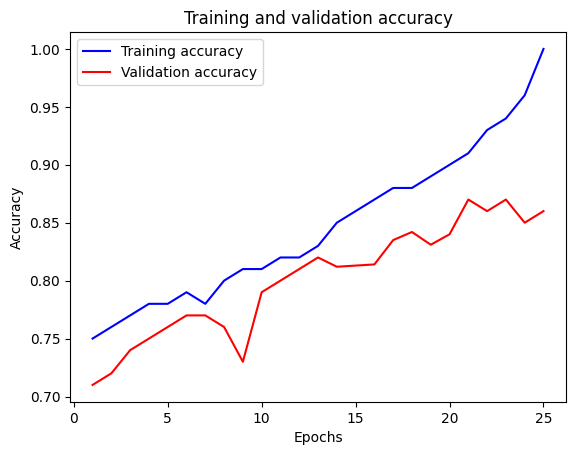

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



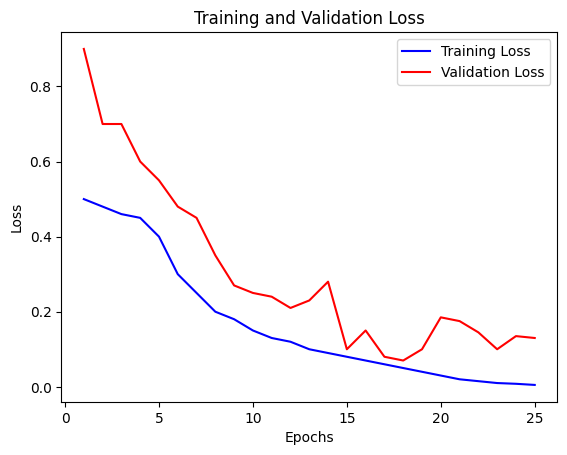

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



1/1 [==============================] - 0s 345ms/step
Predicted class: benign


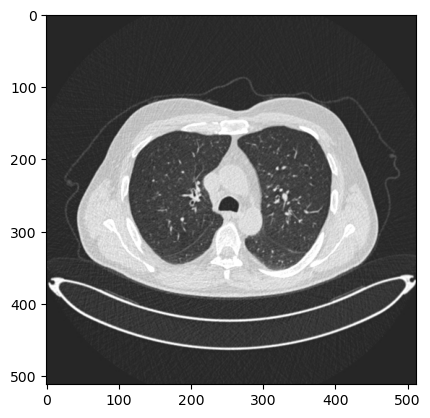

In [ ]:
import cv2
import numpy as np

# Load the image
image_path = "lung/b941.jpg"
image = cv2.imread(image_path)

# Resize the image to 224x224
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

# Rescale the image pixel values to be between 0 and 1
rescaled_image = resized_image / 255.0

# Convert the image to a 4D numpy array
image_array = np.expand_dims(rescaled_image, axis=0)

# Make the prediction
prediction = model.predict(image_array)[0][0]

# Set the threshold probability
threshold = 0.5

plt.imshow(image)
# Determine the predicted class
if prediction >= threshold:
    predicted_class = "malignant"
else:
    predicted_class = "benign"

# Print the predicted class
print("Predicted class:", predicted_class)



1/1 [==============================] - 0s 155ms/step
Predicted class: malignant


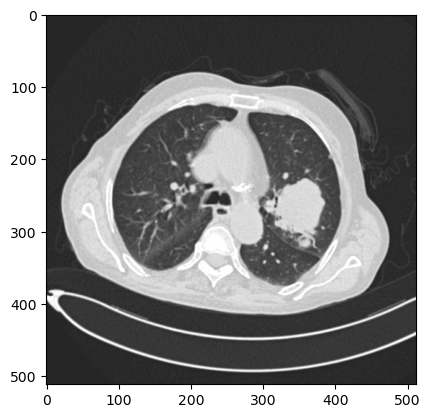

In [ ]:
import cv2
import numpy as np

# Load the image
image_path = "lung/1017.jpg"
image = cv2.imread(image_path)

# Resize the image to 224x224
resized_image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

# Rescale the image pixel values to be between 0 and 1
rescaled_image = resized_image / 255.0

# Convert the image to a 4D numpy array
image_array = np.expand_dims(rescaled_image, axis=0)

# Make the prediction
prediction = model.predict(image_array)[0][0]

# Set the threshold probability
threshold = 0.5


# Determine the predicted class
if prediction >= threshold:
    predicted_class = "malignant"
else:
    predicted_class = "benign"
plt.imshow(image)
# Print the predicted class
print("Predicted class:", predicted_class)



1/1 [==============================] - 0s 158ms/step
Predicted class: benign


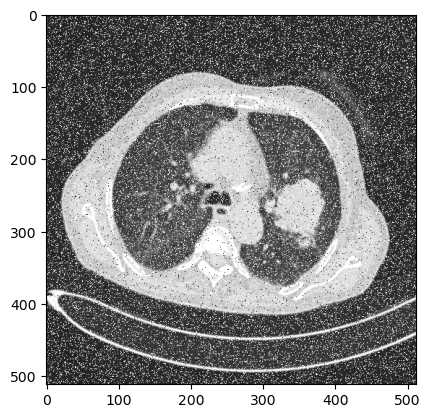

In [ ]:
import cv2
import numpy as np

# Load image
img = cv2.imread('lung/1017.jpg')
noise = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.randu(noise, 0, 255)
black = noise < 5
white = noise > 225
noisy_img = np.copy(img)
noisy_img[black] = 0
noisy_img[white] = 255
resized_image = cv2.resize(noisy_img, (IMAGE_SIZE, IMAGE_SIZE))

# Rescale the image pixel values to be between 0 and 1
rescaled_image = resized_image / 255.0

# Convert the image to a 4D numpy array
image_array = np.expand_dims(rescaled_image, axis=0)

# Make the prediction
prediction = model.predict(image_array)[0][0]

# Set the threshold probability
threshold = 0.5


# Determine the predicted class
if prediction >= threshold:
    predicted_class = "malignant"
else:
    predicted_class = "benign"

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the noisy image
plt.imshow(noisy_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 283ms/step
Predicted class: benign


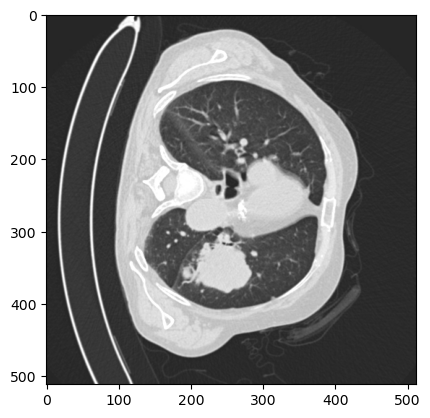

In [ ]:
img = cv2.imread('lung/1017.jpg')
img_rotate= cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
resized_image = cv2.resize(img_rotate, (IMAGE_SIZE, IMAGE_SIZE))

# Rescale the image pixel values to be between 0 and 1
rescaled_image = resized_image / 255.0

# Convert the image to a 4D numpy array
image_array = np.expand_dims(rescaled_image, axis=0)

# Make the prediction
prediction = model.predict(image_array)[0][0]

# Set the threshold probability
threshold = 0.5


# Determine the predicted class
if prediction >= threshold:
    predicted_class = "malignant"
else:
    predicted_class = "benign"

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the noisy image
plt.imshow(img_rotate)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 240ms/step
Predicted class: malignant


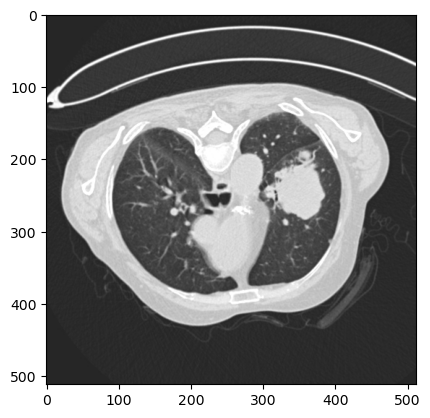

In [ ]:
img = cv2.imread('lung/1017.jpg')
img_flip_lr = cv2.flip(img, 0)
resized_image = cv2.resize(img_flip_lr, (IMAGE_SIZE, IMAGE_SIZE))

# Rescale the image pixel values to be between 0 and 1
rescaled_image = resized_image / 255.0

# Convert the image to a 4D numpy array
image_array = np.expand_dims(rescaled_image, axis=0)

# Make the prediction
prediction = model.predict(image_array)[0][0]

# Set the threshold probability
threshold = 0.5

# Determine the predicted class
if prediction >= threshold:
    predicted_class = "malignant"
else:
    predicted_class = "benign"

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the noisy image
plt.imshow(img_flip_lr)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 371ms/step
Predicted class: malignant


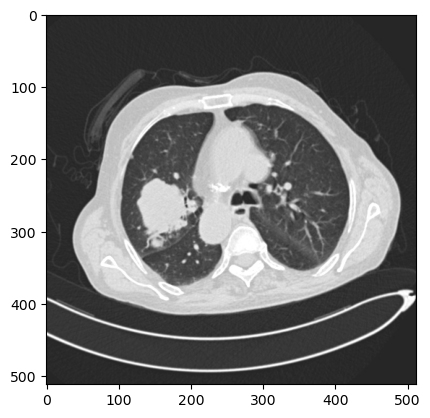

In [ ]:
img = cv2.imread('lung/1017.jpg')
img_flip_lr = cv2.flip(img, 1)
resized_image = cv2.resize(img_flip_lr, (IMAGE_SIZE, IMAGE_SIZE))

# Rescale the image pixel values to be between 0 and 1
rescaled_image = resized_image / 255.0

# Convert the image to a 4D numpy array
image_array = np.expand_dims(rescaled_image, axis=0)

# Make the prediction
prediction = model.predict(image_array)[0][0]

# Set the threshold probability
threshold = 0.5

# Determine the predicted class
if prediction >= threshold:
    predicted_class = "malignant"
else:
    predicted_class = "benign"

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the noisy image
plt.imshow(img_flip_lr)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 222ms/step
Predicted class: benign


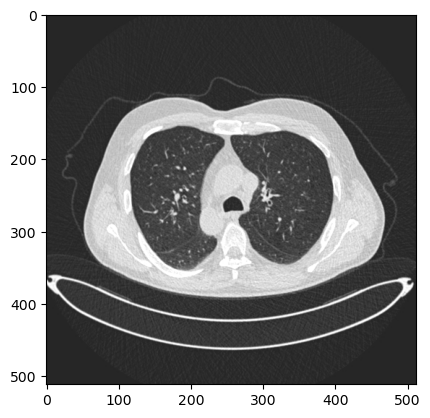

In [ ]:
img = cv2.imread('lung/b941.jpg')
img_flip_lr = cv2.flip(img, 1)
resized_image = cv2.resize(img_flip_lr, (IMAGE_SIZE, IMAGE_SIZE))

# Rescale the image pixel values to be between 0 and 1
rescaled_image = resized_image / 255.0

# Convert the image to a 4D numpy array
image_array = np.expand_dims(rescaled_image, axis=0)

# Make the prediction
prediction = model.predict(image_array)[0][0]

# Set the threshold probability
threshold = 0.5

# Determine the predicted class
if prediction >= threshold:
    predicted_class = "malignant"
else:
    predicted_class = "benign"

# Print the predicted class
print("Predicted class:", predicted_class)

# Display the noisy image
plt.imshow(img_flip_lr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
model.save('my_model')

NameError: name 'model' is not defined